In [584]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.distributions.multivariate_normal import MultivariateNormal
import numpy as np



In [858]:
K_true_cluster = 2
K_model_cluster = 2
feature_dim =10
iter_max = 10
N_seed = 100


In [650]:
pi_ratio = torch.tensor([1.,1.])
pi = pi_ratio/pi_ratio.sum()
N_distribution = N_seed*pi_ratio
N_total = N_distribution.sum()

In [854]:
#mu_true = torch.tensor([[0.,0.,0.],[1.,1.,1.]],requires_grad=False)
mu_true = torch.zeros(10,requires_grad=False)
mu_true = torch.stack((mu_true,torch.ones(10)))
mu_true

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [856]:
#sigma1 = torch.tensor([[0.01,0,0],[0.,0.01,0.],[0,0,0.01]],requires_grad=False)
#sigma2 = torch.tensor([[0.01,0,0],[0.,0.01,0.],[0,0,0.01]],requires_grad=False)
sigma1 = 0.01*torch.eye(10,requires_grad=False)
sigma2 = 0.01*torch.eye(10,requires_grad=False)
sigma = torch.stack((sigma1,sigma2),0)
sigma

tensor([[[0.0100, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0100, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0100, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0100, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0100, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0100, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0100, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0100,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0100, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000,

In [859]:
data=torch.empty(0,feature_dim)
label = torch.empty(0,1).int()
for i in range(K_true_cluster):
    data_distribution = MultivariateNormal(mu_true[i],sigma[i])
    
    data = torch.cat((data,data_distribution.sample([int(N_distribution[i].item()),])),0) #pycharmが勧める方法
    
    #data = torch.cat((data,data_distribution.sample_n(int(N_distribution[i].item()))),0) #sample_nを用いたやり方
    
    #data = torch.cat((data,data_distribution.sample(torch.Size([int(N_distribution[i].item())]))),0)#torch.Size[N]で指定するやり方
    
    #data_distribution =data_distribution.expand(torch.Size([int(N_distribution[i].item())]))#分布をexpandしておくやり方
    #data = torch.cat((data,data_distribution.sample()),0)
    
    label = torch.cat((label,  torch.full((int(N_distribution[i].item()),1),i).int()),0)
    
data.shape,label.shape


(torch.Size([200, 10]), torch.Size([200, 1]))

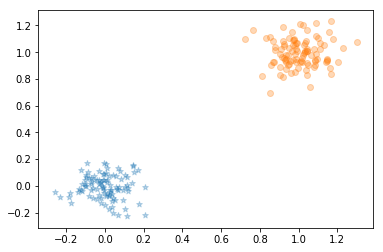

In [861]:
plt.scatter(data[:int(N_distribution[0].item()),0],data[:int(N_distribution[0].item()),9],marker="*",alpha=0.3)
plt.scatter(data[int(N_distribution[0].item()):,0],data[int(N_distribution[0].item()):,9],alpha=0.3)



In [862]:
mu_original = data.mean(0)
mu_original.requires_grad_(False)


tensor([0.5007, 0.4979, 0.5059, 0.4977, 0.5025, 0.5064, 0.5012, 0.4965, 0.4987,
        0.4939])

In [863]:
data_white = data-mu_original
cov_original = torch.matmul(data_white.transpose(1,0),data_white)/N_total
cov_original.requires_grad_(False)


tensor([[0.2615, 0.2505, 0.2520, 0.2489, 0.2575, 0.2467, 0.2479, 0.2471, 0.2459,
         0.2512],
        [0.2505, 0.2562, 0.2500, 0.2467, 0.2555, 0.2446, 0.2451, 0.2441, 0.2457,
         0.2474],
        [0.2520, 0.2500, 0.2619, 0.2495, 0.2587, 0.2476, 0.2473, 0.2467, 0.2484,
         0.2505],
        [0.2489, 0.2467, 0.2495, 0.2554, 0.2538, 0.2445, 0.2441, 0.2436, 0.2455,
         0.2475],
        [0.2575, 0.2555, 0.2587, 0.2538, 0.2727, 0.2514, 0.2516, 0.2525, 0.2537,
         0.2560],
        [0.2467, 0.2446, 0.2476, 0.2445, 0.2514, 0.2526, 0.2412, 0.2405, 0.2421,
         0.2457],
        [0.2479, 0.2451, 0.2473, 0.2441, 0.2516, 0.2412, 0.2513, 0.2418, 0.2428,
         0.2454],
        [0.2471, 0.2441, 0.2467, 0.2436, 0.2525, 0.2405, 0.2418, 0.2531, 0.2423,
         0.2465],
        [0.2459, 0.2457, 0.2484, 0.2455, 0.2537, 0.2421, 0.2428, 0.2423, 0.2543,
         0.2474],
        [0.2512, 0.2474, 0.2505, 0.2475, 0.2560, 0.2457, 0.2454, 0.2465, 0.2474,
         0.2596]])

In [864]:

original_distribution = MultivariateNormal(mu_original,cov_original)
mu_k = original_distribution.sample([K_model_cluster,]).requires_grad_(True)
mu_k



tensor([[0.4482, 0.2464, 0.4078, 0.2830, 0.6050, 0.3963, 0.4023, 0.3324, 0.2993,
         0.4000],
        [0.2725, 0.3888, 0.3158, 0.1407, 0.3973, 0.2899, 0.3447, 0.2426, 0.2379,
         0.2630]], requires_grad=True)

In [865]:
pi_k = torch.full((K_model_cluster,),1./K_model_cluster,requires_grad=False)
pi_k

tensor([0.5000, 0.5000])

In [867]:
#cov_k = cov_original.clone().requires_grad_(True)
cov_k = 0.05*torch.eye(feature_dim,requires_grad=False)
cov_k = cov_k.repeat(K_model_cluster,1,1)
cov_k

tensor([[[0.0500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0500, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0500, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0500, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0500, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0500,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0500, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000,

In [13]:
chol_k = torch.cholesky(cov_original)
chol_k = chol_k.repeat(K_model_cluster,1,1)
chol_k = chol_k.clone().detach().requires_grad_(True)
chol_k


tensor([[[0.5043, 0.0000],
         [0.4920, 0.1610]],

        [[0.5043, 0.0000],
         [0.4920, 0.1610]]], requires_grad=True)

In [691]:
cov_diag_k = torch.diag(torch.diagonal(cov_k[0]))
cov_diag_k = cov_diag_k.repeat(K_model_cluster,1,1)
cov_diag_k



tensor([[[0.2571, 0.0000, 0.0000],
         [0.0000, 0.2562, 0.0000],
         [0.0000, 0.0000, 0.2511]],

        [[0.2571, 0.0000, 0.0000],
         [0.0000, 0.2562, 0.0000],
         [0.0000, 0.0000, 0.2511]]], grad_fn=<RepeatBackward>)

In [701]:
N_nk = torch.empty(int(N_total),K_model_cluster)
for i in range(K_model_cluster):
    N_nk_dist = MultivariateNormal(mu_k[i],covariance_matrix=cov_diag_k[i])
    N_nk[:,i] = N_nk_dist.log_prob(data).exp()


pi_N_nk = pi_k*N_nk
gamma_nk = pi_N_nk/pi_N_nk.sum(1).view(-1,1)
N_k = gamma_nk.sum(0)
N_k
for i in range(K_model_cluster):
    mu_k[i] = (gamma_nk[:,i].view(-1,1)*data).sum(0)/N_k[i]

mu_k

tensor([[ 0.0104,  0.0024, -0.0056],
        [ 1.0011,  1.0153,  0.9986]], grad_fn=<CopySlices>)

In [702]:
pi_k = N_k/N_total
pi_k

tensor([0.5000, 0.5000], grad_fn=<DivBackward0>)

In [703]:

for i in range(K_model_cluster):
    cov_diag_k[i] = torch.diag((gamma_nk[:,i].view(-1,1)*((data-mu_k[i])**2)).sum(0)/N_k[i])

cov_diag_k

tensor([[[0.0122, 0.0000, 0.0000],
         [0.0000, 0.0073, 0.0000],
         [0.0000, 0.0000, 0.0111]],

        [[0.0109, 0.0000, 0.0000],
         [0.0000, 0.0083, 0.0000],
         [0.0000, 0.0000, 0.0088]]], grad_fn=<CopySlices>)

In [882]:
N_nk = torch.empty(int(N_total),K_model_cluster)
for i in range(K_model_cluster):
    N_nk_dist = MultivariateNormal(loc=mu_k[i],covariance_matrix=cov_k[i])
    N_nk[:,i] = N_nk_dist.log_prob(data).exp()

N_nk

tensor([[0.0000e+00, 7.1048e+01],
        [0.0000e+00, 2.3465e+03],
        [0.0000e+00, 1.4356e+03],
        [0.0000e+00, 7.8146e+04],
        [0.0000e+00, 1.5604e+04],
        [0.0000e+00, 3.8699e+04],
        [0.0000e+00, 1.4807e+02],
        [0.0000e+00, 2.9581e+04],
        [0.0000e+00, 7.4026e+03],
        [0.0000e+00, 5.5263e+03],
        [0.0000e+00, 3.3174e+03],
        [0.0000e+00, 5.6670e+03],
        [0.0000e+00, 6.9381e+04],
        [0.0000e+00, 6.2078e+03],
        [0.0000e+00, 2.6283e+04],
        [0.0000e+00, 1.3028e+03],
        [0.0000e+00, 5.6759e+04],
        [0.0000e+00, 7.7984e+03],
        [0.0000e+00, 1.2133e+04],
        [0.0000e+00, 6.6458e+04],
        [0.0000e+00, 1.7563e+05],
        [0.0000e+00, 3.2635e+04],
        [0.0000e+00, 6.8672e+03],
        [0.0000e+00, 1.8099e+02],
        [0.0000e+00, 1.4188e+04],
        [0.0000e+00, 4.8349e+05],
        [0.0000e+00, 1.1360e+04],
        [0.0000e+00, 2.0615e+02],
        [0.0000e+00, 1.2650e+05],
        [0.000

In [883]:

pi_N_nk = pi_k*N_nk
gamma_nk = pi_N_nk/pi_N_nk.sum(1).view(-1,1)
N_k = gamma_nk.sum(0)
gamma_nk

tensor([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0

In [884]:
log_P = torch.log(pi_N_nk.sum(1)).sum()
log_P

tensor(1701.5708, grad_fn=<SumBackward0>)

In [885]:
for i in range(K_model_cluster):
    mu_k[i] = (gamma_nk[:,i].view(-1,1)*data).sum(0)/N_k[i]

mu_k

tensor([[ 1.0028e+00,  9.9508e-01,  1.0078e+00,  9.9314e-01,  1.0158e+00,
          9.9790e-01,  9.9328e-01,  9.8867e-01,  9.9245e-01,  9.9391e-01],
        [-1.3569e-03,  7.3129e-04,  3.9691e-03,  2.2095e-03, -1.0744e-02,
          1.4957e-02,  9.1412e-03,  4.3806e-03,  5.0413e-03, -6.1789e-03]],
       grad_fn=<CopySlices>)

In [886]:

pi_k = N_k/N_total
pi_k

tensor([0.5000, 0.5000], grad_fn=<DivBackward0>)

In [887]:

data_center = torch.empty(K_model_cluster,int(N_total),feature_dim)
data_center_gamma = torch.empty(K_model_cluster,int(N_total),feature_dim)

for i in range(K_model_cluster):
    data_center[i] = data-mu_k[i]
    data_center_gamma[i] = gamma_nk[:,i].view(-1,1)*data_center[i]



#plt.scatter(data_center[1,:,0].detach().numpy(),data_center[1,:,1].detach().numpy())
#plt.scatter(data_center_gamma[0,:,0].detach().numpy(),data_center_gamma[0,:,1].detach().numpy())
#data_center_gamma[1].shape

#data_center_gamma[0]
#torch.matmul(data_center[0].transpose(1,0),data_center_gamma[0])/N_total


In [888]:
for i in range(K_model_cluster):
    cov_k[i] = torch.matmul(data_center[i].transpose(1,0),data_center_gamma[i])/N_k[i]
    
cov_k


tensor([[[ 1.0264e-02,  8.8848e-04,  4.8351e-04,  3.1315e-04, -4.1056e-04,
           1.4140e-03,  4.7937e-05,  2.7457e-04, -1.8013e-03,  5.5864e-04],
         [ 8.8848e-04,  9.5700e-03,  5.1850e-04,  1.2880e-03, -8.9766e-04,
           9.4575e-04, -3.5667e-04, -8.4325e-04,  6.9871e-04, -1.6104e-03],
         [ 4.8351e-04,  5.1850e-04,  1.2651e-02,  7.9399e-04,  1.4690e-03,
           1.7274e-03,  6.2757e-06, -1.7453e-03,  8.1106e-04, -1.0245e-04],
         [ 3.1315e-04,  1.2880e-03,  7.9399e-04,  9.7354e-03, -6.8830e-04,
          -5.3593e-04,  1.8507e-04,  5.7433e-04, -1.6191e-03, -9.2617e-04],
         [-4.1056e-04, -8.9766e-04,  1.4690e-03, -6.8830e-04,  1.0332e-02,
          -9.6542e-04, -8.4488e-04, -6.7899e-04,  1.1765e-03,  1.3432e-04],
         [ 1.4140e-03,  9.4575e-04,  1.7274e-03, -5.3593e-04, -9.6542e-04,
           9.3116e-03, -1.3902e-03, -9.5717e-04, -5.3410e-04,  2.6553e-04],
         [ 4.7937e-05, -3.5667e-04,  6.2757e-06,  1.8507e-04, -8.4488e-04,
          -1.3902e-

In [534]:
theta= torch.rand(1,requires_grad=True)
#pi_k[0] = torch.cos(theta)**2
#pi_k[1] = torch.sin(theta)**2
theta

tensor([0.1339], requires_grad=True)

In [421]:
#def pi_calc(theta_i):
#    return [torch.cos(theta)**2,torch.sin(theta)**2]

def pi_calc(theta_i):
    return [torch.cos(theta)**2,torch.sin(theta)**2]



torch.stack((pi_calc(theta)[0],pi_calc(theta)[1])).view(-1,2)

tensor([[0.3089, 0.6911]], grad_fn=<ViewBackward>)

In [444]:
optimizer = optim.SGD([mu_k,chol_k,theta],lr=0.01)

In [1397]:
optimizer.zero_grad()
#mu_k.grad = None
#chol_k.grad = None
pi_k = torch.stack((pi_calc(theta)[0],pi_calc(theta)[1])).view(-1,2)
N_nk = torch.empty(int(N_total),K_model_cluster)
for i in range(K_model_cluster):
    N_nk_dist = MultivariateNormal(mu_k[i],scale_tril=chol_k[i])
    N_nk[:,i] = N_nk_dist.log_prob(data).exp()
pi_N_nk = pi_k*N_nk

log_P = pi_N_nk.sum(1).log().sum()/N_total

L = -log_P

L.backward()

optimizer.step()

In [1398]:

mu_k

tensor([[0.9707, 0.9438],
        [0.0234, 0.0237]], requires_grad=True)

In [1399]:
chol_k

tensor([[[0.1201, 0.0000],
         [0.1692, 0.2041]],

        [[0.1283, 0.0000],
         [0.0976, 0.1267]]], requires_grad=True)

In [1400]:
torch.matmul(chol_k[0],chol_k[0].t()),torch.matmul(chol_k[1],chol_k[1].t())

(tensor([[0.0144, 0.0203],
         [0.0203, 0.0703]], grad_fn=<MmBackward>), tensor([[0.0165, 0.0125],
         [0.0125, 0.0256]], grad_fn=<MmBackward>))

In [1401]:
pi_calc(theta)

[tensor([0.5051], grad_fn=<PowBackward0>),
 tensor([0.4949], grad_fn=<PowBackward0>)]

In [1402]:
L

tensor(-0.6553, grad_fn=<NegBackward>)

In [1403]:
N_nk/N_nk.sum(1).view(-1,1)

tensor([[2.3602e-16, 1.0000e+00],
        [2.6819e-19, 1.0000e+00],
        [3.7575e-16, 1.0000e+00],
        [8.1985e-16, 1.0000e+00],
        [8.8094e-13, 1.0000e+00],
        [1.8619e-14, 1.0000e+00],
        [3.1400e-10, 1.0000e+00],
        [2.5123e-15, 1.0000e+00],
        [5.8454e-17, 1.0000e+00],
        [1.2977e-17, 1.0000e+00],
        [1.0027e-08, 1.0000e+00],
        [2.8352e-15, 1.0000e+00],
        [5.5005e-16, 1.0000e+00],
        [2.3661e-12, 1.0000e+00],
        [2.4993e-08, 1.0000e+00],
        [1.3837e-16, 1.0000e+00],
        [1.1257e-15, 1.0000e+00],
        [6.5739e-12, 1.0000e+00],
        [1.9319e-08, 1.0000e+00],
        [1.2429e-12, 1.0000e+00],
        [2.6644e-17, 1.0000e+00],
        [1.3198e-17, 1.0000e+00],
        [8.1023e-12, 1.0000e+00],
        [7.9654e-21, 1.0000e+00],
        [1.3645e-12, 1.0000e+00],
        [5.1626e-13, 1.0000e+00],
        [2.8358e-15, 1.0000e+00],
        [1.3244e-16, 1.0000e+00],
        [2.1289e-18, 1.0000e+00],
        [2.476

In [194]:
lr=0.01
mu_k = mu_k - lr*mu_k.grad
mu_k

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [195]:

chol_k  = chol_k - lr*chol_k.grad
chol_k

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [598]:
mu_k

tensor([[0.4350, 0.1879],
        [1.0256, 1.0339]], requires_grad=True)

In [198]:
mu_k.grad

In [ ]:
cov_k.requires_grad

In [204]:
M.backward(retain_graph = True)

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [205]:
cov_k

tensor([[[0.2564, 0.2515],
         [0.2515, 0.2649]],

        [[0.2564, 0.2515],
         [0.2515, 0.2649]]], grad_fn=<RepeatBackward>)

In [490]:
cov_k_test =torch.randn((2,2,2),requires_grad=True)

In [459]:
#cov_k_test[0] =  cov_original.clone()



In [491]:
MM = torch.matmul(cov_k_test,cov_k_test).sum()
MM

tensor(-0.1531, grad_fn=<SumBackward0>)

In [492]:
MM.backward(retain_graph=True)

In [493]:
cov_k_test.grad

tensor([[[-1.4295, -1.7243],
         [ 1.5671,  1.2723]],

        [[-0.8134, -0.1083],
         [-2.5954, -1.8902]]])

In [494]:
cov_k_test

tensor([[[-0.2005,  0.3086],
         [-1.3371,  1.1504]],

        [[-0.8220, -0.2065],
         [ 1.0371, -1.3604]]], requires_grad=True)

In [51]:

mu_test = torch.ones(2,requires_grad =True)

In [52]:
mu_test

tensor([1., 1.], requires_grad=True)

In [62]:
cov_test =torch.rand(2,2,requires_grad=True)
cov_test

tensor([[0.2481, 0.7396],
        [0.4381, 0.3992]], requires_grad=True)

In [63]:
cov2_test= torch.matmul(cov_test,cov_test.t())
cov2_test

tensor([[0.6085, 0.4039],
        [0.4039, 0.3513]], grad_fn=<MmBackward>)

In [69]:
sqrt_cov = torch.cholesky(cov2_test)
sqrt_cov = sqrt_cov.clone().detach().requires_grad_(True)
sqrt_cov

tensor([[0.7801, 0.0000],
        [0.5178, 0.2885]], requires_grad=True)

In [70]:
cov2 = torch.matmul(sqrt_cov,sqrt_cov.t())
cov2

tensor([[0.6085, 0.4039],
        [0.4039, 0.3513]], grad_fn=<MmBackward>)

In [71]:
#cov_k = cov_original.clone().requires_grad_(True)
#cov_k = cov_k.repeat(K_model_cluster,1,1)
L_test_dist = MultivariateNormal(mu_test,scale_tril=sqrt_cov)

In [72]:
data_test = torch.tensor([0.5,0.5],requires_grad=False)
#data_test = data_test.view(-1,2)

In [73]:
L_test = L_test_dist.log_prob(data_test).exp()

In [74]:
L_test

tensor(0.4860, grad_fn=<ExpBackward>)

In [75]:
L_test.backward()

In [76]:
mu_test.grad

tensor([-0.1859, -0.8346])

In [77]:
sqrt_cov.grad

tensor([[-0.7848,  0.0000],
        [ 0.6294, -1.1125]])

In [47]:
mu_test.grad=None
cov_test.grad=None

In [637]:

cov_k[1]

tensor([[0.2564, 0.2515],
        [0.2515, 0.2649]], grad_fn=<SelectBackward>)

In [653]:
cov_test

tensor([[0.9629, 0.6763],
        [0.6903, 0.0225]], requires_grad=True)

In [51]:
theta = torch.randn(1,requires_grad=True)
#theta = theta.clone().detach().requires_grad_(True)
theta
#pi_k[0]= torch.cos(theta)**2
#pi_k[1]= torch.sin(theta)**2

tensor([0.0414], requires_grad=True)

In [52]:
pi_k[0]= torch.cos(theta[0])**2
pi_k[1]= torch.sin(theta[0])**2
pi_k[0]+pi_k[1]

tensor(1., grad_fn=<AddBackward0>)

In [53]:
#L = pi_k[0]**2 + pi_k[1]**2
#L = pi_k[0]**2 + pi_k[1]**2
def loss_func(theta_i):
    return torch.cos(theta_i)**4 + torch.sin(theta_i)**4

def pi_calc(theta_i):
    return [torch.cos(theta)**2,torch.sin(theta)**2]

pi_calc(theta)[0]

tensor([0.9983], grad_fn=<PowBackward0>)

In [54]:
def loss_func2(theta_i):
    return pi_calc(theta)[0]**2+pi_calc(theta)[1]**2

L=loss_func2(theta)
L

tensor([0.9966], grad_fn=<AddBackward0>)

In [55]:
pi_calc(theta)
pi_k =pi_calc(theta)
pi_k

[tensor([0.9983], grad_fn=<PowBackward0>),
 tensor([0.0017], grad_fn=<PowBackward0>)]

In [56]:
optimizer = optim.SGD([theta],lr=0.1)

In [93]:
optimizer.zero_grad()
#pi_k[0]=pi_calc(theta)[0]
#pi_k[1]=pi_calc(theta)[1]
pi_k = pi_calc(theta)
L = pi_k[0]**2 + pi_k[1]**2
#L = pi_calc(theta)[0]**2 + pi_calc(theta)[1]**2
#pi_k[0]= torch.cos(theta[0])**2
#pi_k[1]= torch.sin(theta[0])**2
#L = pi_k[0]**2 + pi_k[1]**2
#L=loss_func2(theta)
#L=torch.cos(theta)**4+torch.sin(theta)**4
L.backward()
optimizer.step()
L

tensor([0.5000], grad_fn=<AddBackward0>)

In [94]:
theta

tensor([0.7840], requires_grad=True)

In [1294]:
3.14/4

0.785